# Caso de Estudio - Análisis de la venta de carros con transformaciones de columnas (preprocesamiento)

In [72]:
import pandas as pd

data = pd.read_csv("datasets/automobile.csv", header=None).dropna()

data.columns = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]

#data = data[ (data["price"] != '?') ]

data.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
150,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0
158,0,91.0,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56.0,4500.0,34,36,7898.0
139,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7053.0
190,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


In [73]:
features_continuous = ["width", "length", "height", "horsepower"]

features_categorical = ["num-of-cylinders", "engine-type", "body-style", "num-of-doors"]

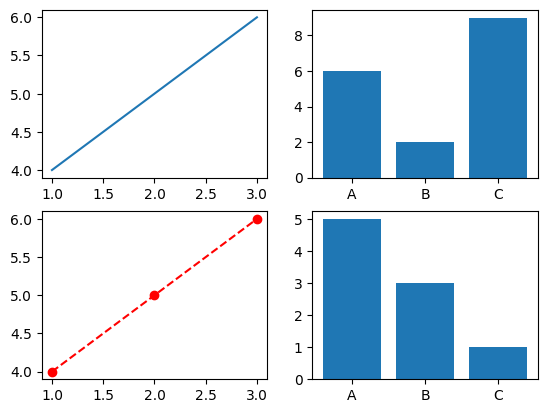

In [74]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(nrows=2, ncols=2)

axis[0, 0].plot([1, 2, 3], [4, 5, 6])
axis[0, 1].bar(["A", "B", "C"], [6, 2, 9])
axis[1, 0].plot([1, 2, 3], [4, 5, 6], "ro--")
axis[1, 1].bar(["A", "B", "C"], [5, 3, 1])

plt.show()

In [75]:
y = data["price"].map(float).values

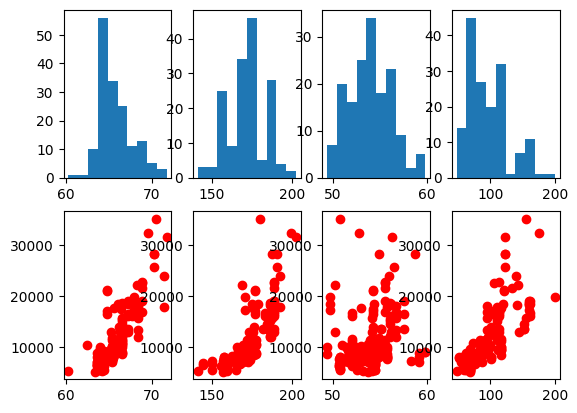

In [76]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(nrows=2, ncols=len(features_continuous))

for i, feature in enumerate(features_continuous):
    axis[0, i].hist(data[feature])
    axis[1, i].plot(data[feature], y, "ro")
    
plt.show()

In [77]:
feature = "num-of-cylinders"
data[ features_categorical ].groupby(feature)[feature].agg("count")

num-of-cylinders
eight      1
five       7
four     136
six       14
three      1
Name: num-of-cylinders, dtype: int64

['num-of-cylinders', 'engine-type', 'body-style', 'num-of-doors']


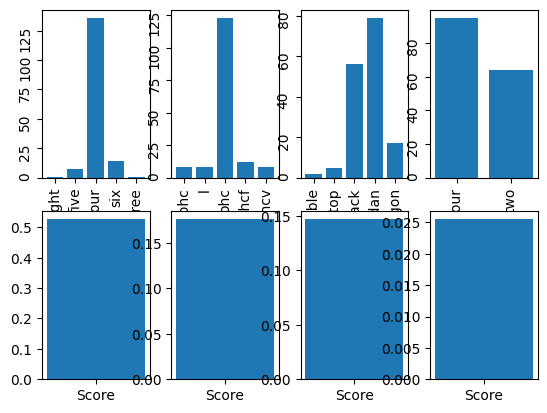

In [78]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(nrows=2, ncols=len(features_categorical))

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

for i, feature in enumerate(features_categorical):
    sizes = data[ features_categorical ].groupby(feature)[feature].agg("count")
    axis[0, i].bar(sizes.index, sizes)
    axis[0, i].tick_params(labelrotation=90)
    X = OneHotEncoder().fit_transform(data[ [feature] ].values).toarray()
    #print(X)
    #print(y)
    reg = LinearRegression()
    reg.fit(X, y)
    s = reg.score(X, y)
    #print("Score:", s)
    axis[1, i].bar(["Score"], s)
  
print(features_categorical)
    
plt.show()

Mezclar 4 características continuas con 4 características categóricas

In [79]:
X1 = data[ features_continuous ].values

X1[:5]

array([[ 66.2, 176.6,  54.3, 102. ],
       [ 66.4, 176.6,  54.3, 115. ],
       [ 71.4, 192.7,  55.7, 110. ],
       [ 71.4, 192.7,  55.9, 140. ],
       [ 64.8, 176.8,  54.3, 101. ]])

In [80]:
data[ features_categorical ].values

array([['four', 'ohc', 'sedan', 'four'],
       ['five', 'ohc', 'sedan', 'four'],
       ['five', 'ohc', 'sedan', 'four'],
       ['five', 'ohc', 'sedan', 'four'],
       ['four', 'ohc', 'sedan', 'two'],
       ['four', 'ohc', 'sedan', 'four'],
       ['six', 'ohc', 'sedan', 'two'],
       ['six', 'ohc', 'sedan', 'four'],
       ['three', 'l', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'sedan', 'four'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'four'],
       ['four', 'ohc', 'sedan', 'four'],
       ['four', 'ohc', 'sedan', 'four'],
       ['four', 'ohc', 'wagon', 'four'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatchback', 'two'],
       ['four', 'ohc', 'hatc

In [81]:
import numpy as np

np.unique(data[ features_categorical ].values[:, 0])

array(['eight', 'five', 'four', 'six', 'three'], dtype=object)

In [82]:
import numpy as np

np.unique(data[ features_categorical ].values[:, 1])

array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv'], dtype=object)

In [83]:
import numpy as np

np.unique(data[ features_categorical ].values[:, 2])

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

In [84]:
import numpy as np

np.unique(data[ features_categorical ].values[:, 3])

array(['four', 'two'], dtype=object)

In [85]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc.fit(data[ features_categorical ].values)

print(enc.categories_)

X2 = enc.transform(data[ features_categorical ].values).toarray()

X2[:5]

[array(['eight', 'five', 'four', 'six', 'three'], dtype=object), array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv'], dtype=object), array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object), array(['four', 'two'], dtype=object)]


array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1.]])

In [86]:
X1[:5] # Características continuas

array([[ 66.2, 176.6,  54.3, 102. ],
       [ 66.4, 176.6,  54.3, 115. ],
       [ 71.4, 192.7,  55.7, 110. ],
       [ 71.4, 192.7,  55.9, 140. ],
       [ 64.8, 176.8,  54.3, 101. ]])

In [87]:
X2[:5] # Características Categóricas

array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1.]])

In [88]:
from sklearn.preprocessing import PolynomialFeatures

X3 = PolynomialFeatures(4).fit_transform(X1)

X3[:5]

array([[1.00000000e+00, 6.62000000e+01, 1.76600000e+02, 5.43000000e+01,
        1.02000000e+02, 4.38244000e+03, 1.16909200e+04, 3.59466000e+03,
        6.75240000e+03, 3.11875600e+04, 9.58938000e+03, 1.80132000e+04,
        2.94849000e+03, 5.53860000e+03, 1.04040000e+04, 2.90117528e+05,
        7.73938904e+05, 2.37966492e+05, 4.47008880e+05, 2.06461647e+06,
        6.34816956e+05, 1.19247384e+06, 1.95190038e+05, 3.66655320e+05,
        6.88744800e+05, 5.50772310e+06, 1.69348451e+06, 3.18113112e+06,
        5.20703334e+05, 9.78116760e+05, 1.83734640e+06, 1.60103007e+05,
        3.00745980e+05, 5.64937200e+05, 1.06120800e+06, 1.92057804e+07,
        5.12347554e+07, 1.57533818e+07, 2.95919879e+07, 1.36677610e+08,
        4.20248825e+07, 7.89417682e+07, 1.29215805e+07, 2.42725822e+07,
        4.55949058e+07, 3.64611269e+08, 1.12108674e+08, 2.10590880e+08,
        3.44705607e+07, 6.47513295e+07, 1.21632332e+08, 1.05988191e+07,
        1.99093839e+07, 3.73988426e+07, 7.02519696e+07, 9.726638

In [92]:
import numpy as np

X = np.concatenate((X3, X2), axis=1)

X[:5]

array([[1.00000000e+00, 6.62000000e+01, 1.76600000e+02, 5.43000000e+01,
        1.02000000e+02, 4.38244000e+03, 1.16909200e+04, 3.59466000e+03,
        6.75240000e+03, 3.11875600e+04, 9.58938000e+03, 1.80132000e+04,
        2.94849000e+03, 5.53860000e+03, 1.04040000e+04, 2.90117528e+05,
        7.73938904e+05, 2.37966492e+05, 4.47008880e+05, 2.06461647e+06,
        6.34816956e+05, 1.19247384e+06, 1.95190038e+05, 3.66655320e+05,
        6.88744800e+05, 5.50772310e+06, 1.69348451e+06, 3.18113112e+06,
        5.20703334e+05, 9.78116760e+05, 1.83734640e+06, 1.60103007e+05,
        3.00745980e+05, 5.64937200e+05, 1.06120800e+06, 1.92057804e+07,
        5.12347554e+07, 1.57533818e+07, 2.95919879e+07, 1.36677610e+08,
        4.20248825e+07, 7.89417682e+07, 1.29215805e+07, 2.42725822e+07,
        4.55949058e+07, 3.64611269e+08, 1.12108674e+08, 2.10590880e+08,
        3.44705607e+07, 6.47513295e+07, 1.21632332e+08, 1.05988191e+07,
        1.99093839e+07, 3.73988426e+07, 7.02519696e+07, 9.726638

Tomamos 4 características continuas y las transformamos a 70 características polinomiales de grado 4.

Tomamos 4 características categóricas y las transformamos a 17 características codificadas en formato `One-Hot-Encoder` (cada categoría es una columna nueva indicando 1 si está presente o 0 sino).

Unimos todas las características (70 + 17) obteniendo la matriz numérica de aprendizaje.

In [93]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

reg.score(X, y)

0.8879653415350105

In [94]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X1, y)

reg.score(X1, y)

0.7786217891429539

Vamos a contrastar ambas regresiones usando el primer componente principal para graficarlo respecto al precio

In [96]:
from sklearn.decomposition import PCA

# Usando continuas y categóricas
Xc1_87 = PCA(n_components=1).fit_transform(X) 
# Usando solo las continuas
Xc1_4 = PCA(n_components=1).fit_transform(X1) 

from sklearn.linear_model import LinearRegression

reg1_87_c1 = LinearRegression()
reg1_87_c1.fit(Xc1_87, y)

reg1_4_c1 = LinearRegression()
reg1_4_c1.fit(Xc1_4, y)

reg1_87_c1.score(Xc1_87, y), reg1_4_c1.score(Xc1_4, y),

(0.6641039518767289, 0.6125698702846075)

In [100]:
Xc1_87[:5].min(), Xc1_87[:5].max()

(18321501.652619638, 949143263.0018203)

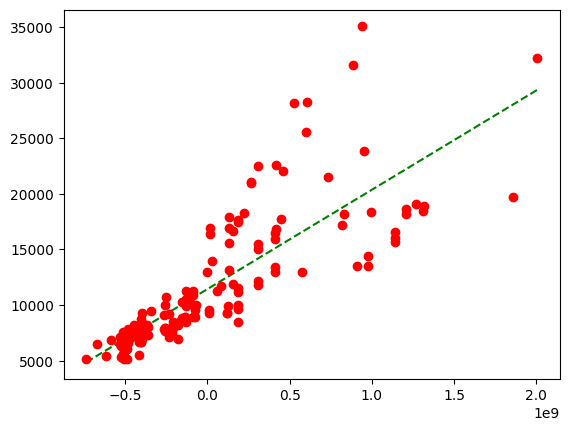

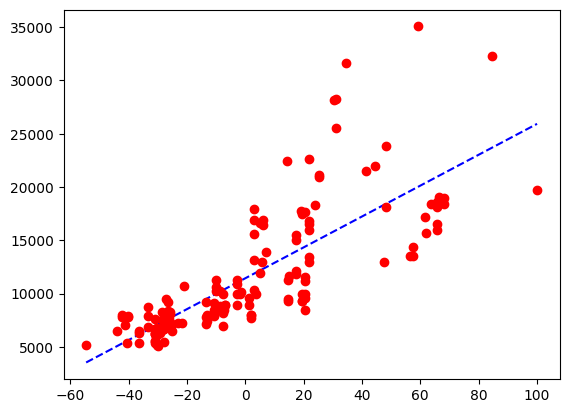

In [124]:
import numpy as np

x1_87 = np.linspace(Xc1_87.min(), Xc1_87.max(), 101)
x1_4 = np.linspace(Xc1_4.min(), Xc1_4.max(), 101)

#print(x1_87[:5].reshape(-1, 1))

y1_87 = reg1_87_c1.predict(x1_87.reshape(-1, 1))

#print(y1_87[:5])

y1_4 = reg1_4_c1.predict(x1_4.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.plot(x1_87, y1_87, "g--")
plt.plot(Xc1_87, y, "ro")
plt.show()

plt.plot(x1_4, y1_4, "b--")
plt.plot(Xc1_4, y, "ro")
plt.show()